# Validating machine learning models

In modern day machine learning it is important to be able to explain how our models "think". A simple accuracy score isn't enough. This notebook explores the lesson on interpretability.

## How To

In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd

df = pd.read_csv("data/housing.csv")
df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [2]:
df = df.dropna()

In [3]:
x_train, x_, y_train, y_ = train_test_split(df.drop(["longitude","latitude", "ocean_proximity", "median_house_value"], axis=1), 
                                                    df.median_house_value, test_size=.5, stratify=df.ocean_proximity)

x_val, x_test, y_val, y_test = train_test_split(x_, y_, test_size=.5)

In [4]:
from sklearn.ensemble import RandomForestRegressor

In [5]:
model = RandomForestRegressor()

In [6]:
model.fit(x_train, y_train)

RandomForestRegressor()

In [7]:
model.score(x_val, y_val)

0.6556994491877645

## Influence of Variables

In [8]:
import eli5

C:\tools\Anaconda3\envs\skillshare\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\tools\Anaconda3\envs\skillshare\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


In [9]:
eli5.explain_weights(model)

Explanation(estimator='RandomForestRegressor()', description='\nRandom forest feature importances; values are numbers 0 <= x <= 1;\nall values sum to 1.\n', error=None, method='feature importances', is_regression=True, targets=None, feature_importances=FeatureImportances(importances=[FeatureWeight(feature='x5', weight=0.5667877033603446, std=0.00841680749109398, value=None), FeatureWeight(feature='x3', weight=0.10564312361305908, std=0.006052261117665171, value=None), FeatureWeight(feature='x0', weight=0.09566374264038832, std=0.005333010779630694, value=None), FeatureWeight(feature='x2', weight=0.09023838276674524, std=0.006687473112443481, value=None), FeatureWeight(feature='x1', weight=0.07361192693024816, std=0.006256139007962976, value=None), FeatureWeight(feature='x4', weight=0.06805512068921464, std=0.006545124891306123, value=None)], remaining=0), decision_tree=None, highlight_spaces=None, transition_features=None, image=None)

In [10]:
for x in range(5):
    display(eli5.explain_prediction(model, x_train.iloc[x, :]))

Explanation(estimator='RandomForestRegressor()', description='\nFeatures with largest coefficients.\n\nFeature weights are calculated by following decision paths in trees\nof an ensemble (or a single tree for DecisionTreeClassifier).\nEach node of the tree has an output score, and contribution of a feature\non the decision path is how much the score changes from parent to child.\nWeights of all features sum to the output score or proba of the estimator.\n\nCaveats:\n1. Feature weights just show if the feature contributed positively or\n   negatively to the final score, and does not show how increasing or\n   decreasing the feature value will change the prediction.\n2. In some cases, feature weight can be close to zero for an important feature.\n   For example, in a single tree that computes XOR function, the feature at the\n   top of the tree will have zero weight because expected scores for both\n   branches are equal, so decision at the top feature does not change the\n   expected score. For an ensemble predicting XOR functions it might not be\n   a problem, but it is not reliable if most trees happen to choose the same\n   feature at the top.\n', error=None, method='decision path', is_regression=True, targets=[TargetExplanation(target='y', feature_weights=FeatureWeights(pos=[FeatureWeight(feature='<BIAS>', weight=206727.1120379797, std=None, value=1.0), FeatureWeight(feature='median_income', weight=67946.95215258111, std=None, value=5.4562), FeatureWeight(feature='total_bedrooms', weight=17204.41294790117, std=None, value=667.0), FeatureWeight(feature='housing_median_age', weight=4310.366776858451, std=None, value=28.0)], neg=[FeatureWeight(feature='population', weight=-25976.249508324312, std=None, value=2048.0), FeatureWeight(feature='households', weight=-945.6970320239207, std=None, value=685.0), FeatureWeight(feature='total_rooms', weight=-753.8973749721359, std=None, value=4485.0)], pos_remaining=0, neg_remaining=0), proba=None, score=268513.0, weighted_spans=None, heatmap=None)], feature_importances=None, decision_tree=None, highlight_spaces=None, transition_features=None, image=None)

Explanation(estimator='RandomForestRegressor()', description='\nFeatures with largest coefficients.\n\nFeature weights are calculated by following decision paths in trees\nof an ensemble (or a single tree for DecisionTreeClassifier).\nEach node of the tree has an output score, and contribution of a feature\non the decision path is how much the score changes from parent to child.\nWeights of all features sum to the output score or proba of the estimator.\n\nCaveats:\n1. Feature weights just show if the feature contributed positively or\n   negatively to the final score, and does not show how increasing or\n   decreasing the feature value will change the prediction.\n2. In some cases, feature weight can be close to zero for an important feature.\n   For example, in a single tree that computes XOR function, the feature at the\n   top of the tree will have zero weight because expected scores for both\n   branches are equal, so decision at the top feature does not change the\n   expected score. For an ensemble predicting XOR functions it might not be\n   a problem, but it is not reliable if most trees happen to choose the same\n   feature at the top.\n', error=None, method='decision path', is_regression=True, targets=[TargetExplanation(target='y', feature_weights=FeatureWeights(pos=[FeatureWeight(feature='<BIAS>', weight=206727.1120379797, std=None, value=1.0), FeatureWeight(feature='total_rooms', weight=22868.678498102803, std=None, value=1228.0)], neg=[FeatureWeight(feature='median_income', weight=-42622.78104499923, std=None, value=3.0225), FeatureWeight(feature='population', weight=-20468.349589479698, std=None, value=1603.0), FeatureWeight(feature='housing_median_age', weight=-9159.04427985055, std=None, value=30.0), FeatureWeight(feature='total_bedrooms', weight=-6803.698911011207, std=None, value=358.0), FeatureWeight(feature='households', weight=-3110.9167107417757, std=None, value=323.0)], pos_remaining=0, neg_remaining=0), proba=None, score=147431.0, weighted_spans=None, heatmap=None)], feature_importances=None, decision_tree=None, highlight_spaces=None, transition_features=None, image=None)

Explanation(estimator='RandomForestRegressor()', description='\nFeatures with largest coefficients.\n\nFeature weights are calculated by following decision paths in trees\nof an ensemble (or a single tree for DecisionTreeClassifier).\nEach node of the tree has an output score, and contribution of a feature\non the decision path is how much the score changes from parent to child.\nWeights of all features sum to the output score or proba of the estimator.\n\nCaveats:\n1. Feature weights just show if the feature contributed positively or\n   negatively to the final score, and does not show how increasing or\n   decreasing the feature value will change the prediction.\n2. In some cases, feature weight can be close to zero for an important feature.\n   For example, in a single tree that computes XOR function, the feature at the\n   top of the tree will have zero weight because expected scores for both\n   branches are equal, so decision at the top feature does not change the\n   expected score. For an ensemble predicting XOR functions it might not be\n   a problem, but it is not reliable if most trees happen to choose the same\n   feature at the top.\n', error=None, method='decision path', is_regression=True, targets=[TargetExplanation(target='y', feature_weights=FeatureWeights(pos=[FeatureWeight(feature='<BIAS>', weight=206727.1120379797, std=None, value=1.0), FeatureWeight(feature='households', weight=17186.951141769227, std=None, value=308.0), FeatureWeight(feature='population', weight=16984.921268894872, std=None, value=687.0), FeatureWeight(feature='total_rooms', weight=15171.229967841553, std=None, value=1125.0), FeatureWeight(feature='housing_median_age', weight=6615.827231125529, std=None, value=23.0), FeatureWeight(feature='total_bedrooms', weight=5175.544844203078, std=None, value=273.0)], neg=[FeatureWeight(feature='median_income', weight=-51004.58649181392, std=None, value=2.3182)], pos_remaining=0, neg_remaining=0), proba=None, score=216857.0, weighted_spans=None, heatmap=None)], feature_importances=None, decision_tree=None, highlight_spaces=None, transition_features=None, image=None)

Explanation(estimator='RandomForestRegressor()', description='\nFeatures with largest coefficients.\n\nFeature weights are calculated by following decision paths in trees\nof an ensemble (or a single tree for DecisionTreeClassifier).\nEach node of the tree has an output score, and contribution of a feature\non the decision path is how much the score changes from parent to child.\nWeights of all features sum to the output score or proba of the estimator.\n\nCaveats:\n1. Feature weights just show if the feature contributed positively or\n   negatively to the final score, and does not show how increasing or\n   decreasing the feature value will change the prediction.\n2. In some cases, feature weight can be close to zero for an important feature.\n   For example, in a single tree that computes XOR function, the feature at the\n   top of the tree will have zero weight because expected scores for both\n   branches are equal, so decision at the top feature does not change the\n   expected score. For an ensemble predicting XOR functions it might not be\n   a problem, but it is not reliable if most trees happen to choose the same\n   feature at the top.\n', error=None, method='decision path', is_regression=True, targets=[TargetExplanation(target='y', feature_weights=FeatureWeights(pos=[FeatureWeight(feature='<BIAS>', weight=206727.1120379797, std=None, value=1.0), FeatureWeight(feature='total_rooms', weight=58160.15902547827, std=None, value=1951.0), FeatureWeight(feature='households', weight=32081.634140011814, std=None, value=813.0), FeatureWeight(feature='total_bedrooms', weight=13152.51803503369, std=None, value=846.0), FeatureWeight(feature='housing_median_age', weight=8281.158449922435, std=None, value=42.0)], neg=[FeatureWeight(feature='median_income', weight=-93130.71359036738, std=None, value=1.5195), FeatureWeight(feature='population', weight=-7645.86809805855, std=None, value=2500.0)], pos_remaining=0, neg_remaining=0), proba=None, score=217626.0, weighted_spans=None, heatmap=None)], feature_importances=None, decision_tree=None, highlight_spaces=None, transition_features=None, image=None)

Explanation(estimator='RandomForestRegressor()', description='\nFeatures with largest coefficients.\n\nFeature weights are calculated by following decision paths in trees\nof an ensemble (or a single tree for DecisionTreeClassifier).\nEach node of the tree has an output score, and contribution of a feature\non the decision path is how much the score changes from parent to child.\nWeights of all features sum to the output score or proba of the estimator.\n\nCaveats:\n1. Feature weights just show if the feature contributed positively or\n   negatively to the final score, and does not show how increasing or\n   decreasing the feature value will change the prediction.\n2. In some cases, feature weight can be close to zero for an important feature.\n   For example, in a single tree that computes XOR function, the feature at the\n   top of the tree will have zero weight because expected scores for both\n   branches are equal, so decision at the top feature does not change the\n   expected score. For an ensemble predicting XOR functions it might not be\n   a problem, but it is not reliable if most trees happen to choose the same\n   feature at the top.\n', error=None, method='decision path', is_regression=True, targets=[TargetExplanation(target='y', feature_weights=FeatureWeights(pos=[FeatureWeight(feature='<BIAS>', weight=206727.1120379797, std=None, value=1.0), FeatureWeight(feature='population', weight=91543.22530016846, std=None, value=1026.0), FeatureWeight(feature='total_bedrooms', weight=44576.227773894316, std=None, value=687.0), FeatureWeight(feature='households', weight=15257.75688900795, std=None, value=592.0), FeatureWeight(feature='total_rooms', weight=15210.429938229026, std=None, value=2075.0), FeatureWeight(feature='housing_median_age', weight=13843.871962384443, std=None, value=30.0)], neg=[FeatureWeight(feature='median_income', weight=-16889.49390166382, std=None, value=3.1635)], pos_remaining=0, neg_remaining=0), proba=None, score=370269.13, weighted_spans=None, heatmap=None)], feature_importances=None, decision_tree=None, highlight_spaces=None, transition_features=None, image=None)

In [11]:
from sklearn.inspection import permutation_importance

In [12]:
permutation_importance(model, x_train, y_train)

{'importances_mean': array([0.30626287, 0.20438274, 0.49193051, 0.39923199, 0.23444423,
        1.56607312]),
 'importances_std': array([0.00300465, 0.00150659, 0.00796738, 0.00607609, 0.00408509,
        0.01063025]),
 'importances': array([[0.30934077, 0.30191579, 0.30701877, 0.30368526, 0.30935374],
        [0.20672229, 0.20405023, 0.20400822, 0.20210153, 0.20503143],
        [0.47992992, 0.49622957, 0.49475018, 0.50258828, 0.48615459],
        [0.40668523, 0.38972197, 0.39519039, 0.40363647, 0.40092587],
        [0.23050688, 0.2363061 , 0.24161848, 0.23186354, 0.23192618],
        [1.56854817, 1.5623001 , 1.54913014, 1.58194708, 1.56844011]])}

In [13]:
from sklearn.inspection import plot_partial_dependence

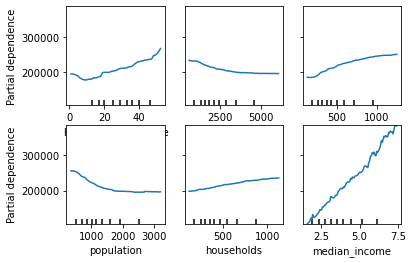

In [14]:
plot_partial_dependence(model, x_train, x_train.columns)

## Shap

In [15]:
import shap

In [16]:
expl = shap.TreeExplainer(model)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


In [17]:
shap.TreeExplainer(model, data=x_train)

Passing 10216 background samples may lead to slow runtimes. Consider using shap.sample(data, 100) to create a smaller background data set.


In [18]:
shap_val = expl.shap_values(x_val)

In [21]:
shap.initjs()

In [22]:
shap.force_plot(expl.expected_value, shap_val[0, :], x_val.iloc[0, :])

## Exercise

Check out `shap` further and see which plots you can generate.

## Additional Resources

- [shap](https://github.com/slundberg/shap)
- [Scikit Yellowbrick](https://www.scikit-yb.org/en/latest/)